In [72]:
# Load the Module
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Load the Dataset
deal = pd.read_csv('/content/drive/MyDrive/데청캠_인바디/ZohoCRM_Dataset/deal_closed_prediction_data.csv')

print(deal)

X = deal[['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry']]
y = deal[['Stage']]

print(y.value_counts())

# Min-Max Scaling
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X) 
scaled = scaler.transform(X) 
scaled_X = pd.DataFrame(scaled,columns=['Year', 'Month', 'Day', 'LeadSource', 'Territory', 'Industry'])


      Year  Month  Day  LeadSource    Territory       Industry  Stage
0     2017      2    7    0.000458    50.000000  132320.620804      0
1     2017      2    7    0.000458    50.000000  132320.620804      0
2     2017      2    7    0.000458  3430.305858  132320.620804      1
3     2017      2    7    0.000458  1394.639984   61963.087644      1
4     2017      2   14    0.000458    50.000000  132320.620804      1
...    ...    ...  ...         ...          ...            ...    ...
2136  2021      7   24   32.692308   645.756033    1430.564418      0
2137  2021      7   26   25.000000   645.756033    1430.564418      0
2138  2021      7   26   25.000000  1014.059096    2727.317659      0
2139  2021      7   26   40.384615   645.756033    2727.317659      0
2140  2021      7   26   32.692308   645.756033    1073.495543      0

[2141 rows x 7 columns]
Stage
0        1212
1         929
dtype: int64


In [81]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X , y, test_size=0.3, random_state=1)

print(X_train.shape)
print(y_test.shape)

(1498, 6)
(643, 1)


In [130]:
model = XGBClassifier(booster='gbtree',n_estimators= 200, learning_rate=0.04, gamma=1.3, silent=0,reg_alpha=.1,reg_lambda=1.34,
                      max_depth=7, objective='binary:logistic')
model.fit(X_train, y_train)
print('Accuracy of Train : ',model.score(X_train,y_train)*100,'%')
pred_y = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Train :  91.52202937249666 %


In [131]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# 0.8740
# 0.8756
get_clf_eval(y_test, pred_y)

오차행렬:
 [[333  33]
 [ 47 230]]

정확도: 0.8756
정밀도: 0.8745
재현율: 0.8303
F1: 0.8519
AUC: 0.8701


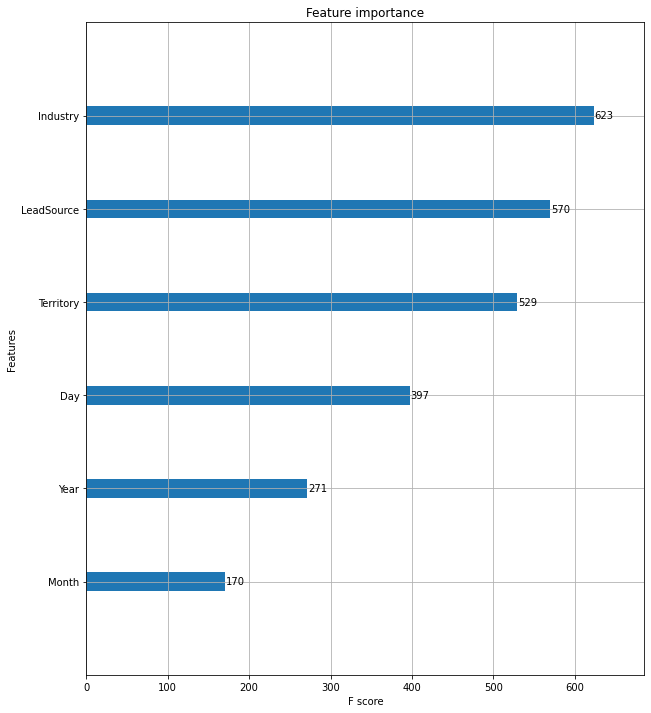

In [132]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(model, ax=ax)